In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

likely_sales = pd.read_csv("../data/processed/likely_sales.csv", index_col=0)

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (25,28,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
likely_sales.columns

Index(['Borough', 'Block', 'Lot', 'SalePrice', 'LandSquareFeet',
       'MarketValueSqFt', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council',
       'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'SanitBoro',
       'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2',
       'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2',
       'LtdHeight', 'AllZoning1', 'AllZoning2', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'BuiltCode', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', '

In [4]:
likely_sales.groupby(['Borough'])['MarketValueSqFt'].agg([np.average, np.median, len])

,average,median,len
Borough,,,
Bronx,220.937916,208.715000,2427.0
Brooklyn,386.759096,369.392482,4968.0
Manhattan,383.785977,370.083000,104.0
Queens,385.427838,366.297468,7959.0
Staten Island,295.718404,285.326087,3809.0


Reminder: the data we are constructing this model on is based on non-apartment units we have deemed to likely be true market sales. Since there are *very* few non-apartment sales in Manhattan that, all told, satisfied the criteria we used for filtering (in particular, our setting the maximum value cutoff at an aggressive 1000$), there are very few data points in Manhattan under consideration here.

In [5]:
likely_zips = likely_sales.groupby(['Borough', 'ZipCode'])['MarketValueSqFt'].agg([np.average, np.median, len])
likely_zips

average      median    len
Borough       ZipCode                               
Bronx         10451.0  137.431440  133.951654   18.0
              10452.0  192.878836  202.523197   30.0
              10453.0  155.923740  137.329402   36.0
              10454.0  189.702541  197.997486   20.0
              10455.0  191.326039  205.168452   25.0
              10456.0  170.298004  151.534157   74.0
              10457.0  180.420482  169.922234   72.0
              10458.0  179.140044  170.270338   68.0
              10459.0  173.503913  162.450019   70.0
              10460.0  174.831416  166.666667   78.0
              10461.0  240.488300  240.743034  222.0
              10462.0  216.083732  213.383838  125.0
              10463.0  281.041337  263.101591   52.0
              10464.0  341.513207  297.230730   34.0
              10465.0  261.735300  250.511627  256.0
              10466.0  226.805342  214.455917  283.0
              10467.0  199.653564  188.580477  128.0
              10468.0  171.662719  172.661442   34.0
              10469.0  235.952632  226.685338  320.0
              10470.0  207.976102  197.463768   73.0
              10471.0  374.014257  355.104419   62.0
              10472.0  189.007969  178.160920  133.0
              10473.0  197.638336  193.014706  181.0
              10474.0  143.261338  132.653061   19.0
              10475.0  239.604929  233.429395   13.0
              10803.0  379.545455  379.545455    1.0
Brooklyn      11201.0  520.835561  519.143413    3.0
              11203.0  283.872105  270.948509  229.0
              11204.0  519.132070  520.161290  197.0
              11205.0  505.951440  555.444444   37.0
...                           ...         ...    ...
Queens        11419.0  313.364370  308.948864  195.0
              11420.0  331.235775  328.840567  252.0
              11421.0  311.523531  318.117481  229.0
              11422.0  304.814678  293.918919  173.0
              11423.0  329.508900  320.512821  158.0
              11426.0  414.325476  403.133239  134.0
              11427.0  391.197069  372.834631  126.0
              11428.0  324.709771  329.242544  120.0
              11429.0  273.965297  275.349650  151.0
              11432.0  419.792272  394.736842  143.0
              11433.0  283.537232  275.493421  193.0
              11434.0  293.954540  284.079392  300.0
              11435.0  286.707000  281.021898  147.0
              11436.0  309.271619  297.379032  145.0
              11691.0  215.238526  196.464646  205.0
              11692.0  233.225357  240.067698  108.0
              11693.0  235.723063  207.939644   54.0
              11694.0  362.183351  368.518519   78.0
Staten Island 10301.0  268.571154  262.461300  204.0
              10302.0  242.881033  233.874696  142.0
              10303.0  219.440268  211.726384  165.0
              10304.0  291.786651  272.541892  282.0
              10305.0  307.382798  296.983759  343.0
              10306.0  326.328121  310.218254  540.0
              10307.0  288.555830  297.583516  116.0
              10308.0  311.968497  312.568681  296.0
              10309.0  289.608315  274.504383  304.0
              10310.0  277.009390  270.979021  185.0
              10312.0  294.896021  281.853252  572.0
              10314.0  307.862838  297.581845  660.0

[163 rows x 3 columns]

The build set is heavily skewed towards lower-value Zip Codes.

In [6]:
import geopandas as gpd
import shapely

In [7]:
zips = gpd.read_file("../data/zip_codes/ZIP_CODE_040114.shp")

In [8]:
zips.head(0)

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry


In [9]:
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)

In [10]:
geoms = likely_zips.reset_index()['ZipCode'].map(lambda zipcode: zips[zips['ZIPCODE'] == zipcode]['geometry'])
geoms = geoms.values
geoms = [geom.iloc[0] if len(geom) > 0 else shapely.geometry.Point(0, 0) for geom in geoms]

In [11]:
example_zip = likely_zips.reset_index()['ZipCode'].iloc[0]
print(example_zip)
zips[zips['ZIPCODE'] == example_zip]

10451.0


,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
39,2.894411e+07,0,Bronx,005,44140.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10451,"POLYGON ((1002809.989770979 240846.5980808884,..."


In [12]:
zips['ZIPCODE']

0      11436
1      11213
2      11212
3      11225
4      11218
5      11226
6      11219
7      11210
8      11230
9      11204
10     10471
11     10470
12     10466
13     10467
14     10463
15     10475
16     10464
17     10469
18     10468
19     10463
20     10458
21     10034
22     10033
23     10462
24     10040
25     10453
26     10465
27     10464
28     10464
29     10461
       ...  
233    10120
234    10278
235    10155
236    10043
237    10081
238    10096
239    10097
240    10196
241    10196
242    10275
243    10265
244    10045
245    10047
246    10047
247    10080
248    10203
249    10259
250    10260
251    10285
252    10286
253    10035
254    11371
255    11361
256    10036
257    11414
258    10310
259    11693
260    11249
261    10162
262    10119
Name: ZIPCODE, dtype: int32

In [13]:
data_by_zip = gpd.GeoDataFrame(likely_zips.reset_index(), geometry=geoms)

In [14]:
data_by_zip.crs = zips.crs

In [15]:
data_by_zip = data_by_zip.to_crs(epsg=4326)

In [16]:
data_by_zip = data_by_zip[data_by_zip.geometry.map(lambda geom: not isinstance(geom, shapely.geometry.Point))]

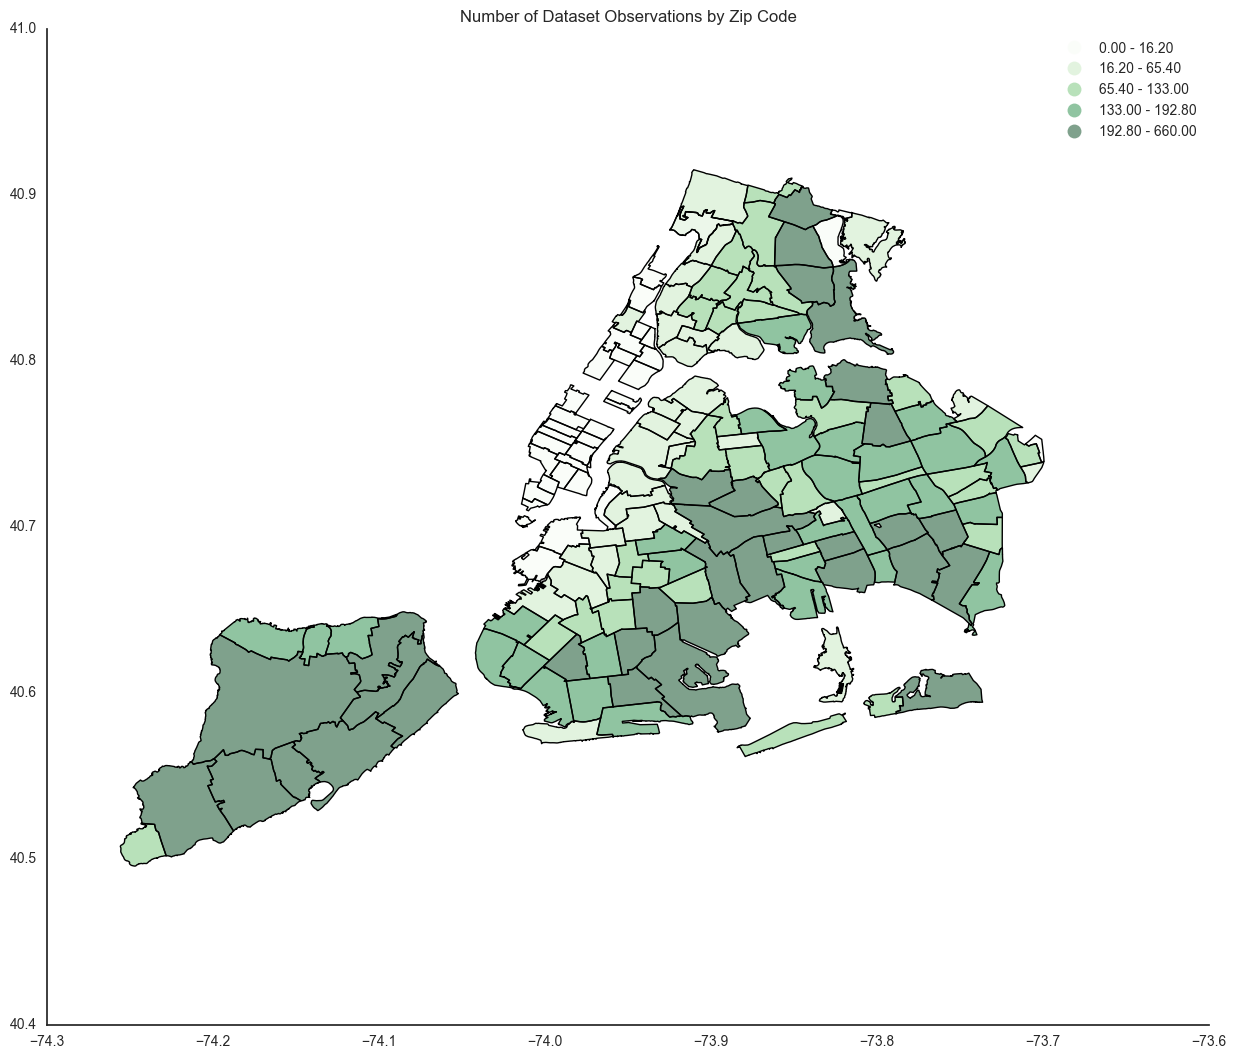

In [17]:
sns.set_style("white")
data_by_zip.plot(scheme='QUANTILES', column='len', cmap='Greens', legend=True, figsize=(15, 15))
sns.despine()
plt.title("Number of Dataset Observations by Zip Code")

There are outliers in land square feet, possibly corresponding with errors in the dataset.

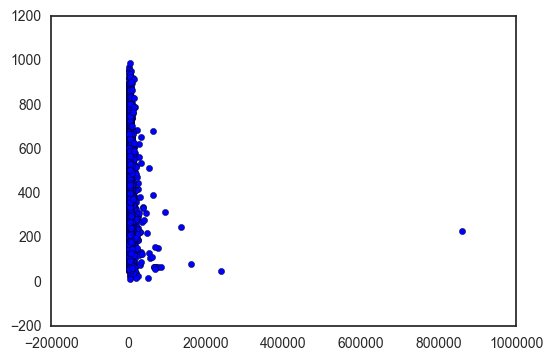

In [18]:
plt.scatter(likely_sales['LandSquareFeet'], likely_sales['MarketValueSqFt'])

In [19]:
likely_sales.sort_values(by='LandSquareFeet', ascending=False).head()[['Address', 'LandSquareFeet']]

,Address,LandSquareFeet
Index,,
8042,315 NORMAN AVENUE,860000.0
16222,5700 AVENUE D,238500.0
9232,2021 PITKIN AVENUE,160000.0
36348,2094 RICHMOND AVENUE,135000.0
21080,37-10 114 STREET,93750.0


We remove these outlying points.

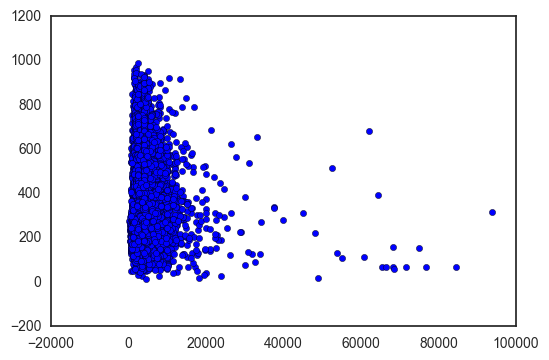

In [20]:
plt.scatter(likely_sales[likely_sales['LandSquareFeet'] < 100000]['LandSquareFeet'],
            likely_sales[likely_sales['LandSquareFeet'] < 100000]['MarketValueSqFt'])

In [21]:
likely_sales = likely_sales[likely_sales['LandSquareFeet'] < 100000]

Community districts (`CD`) are a different categorical variable from ZIP Code. Less granular than ZIP Codes but also more reliable because they cover better-sized areas.

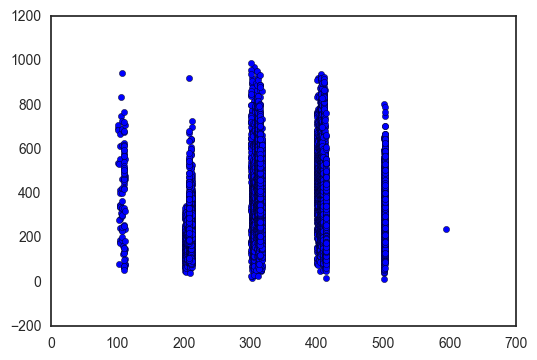

In [22]:
plt.scatter(likely_sales['CD'], likely_sales['MarketValueSqFt'])

In [23]:
likely_sales.columns

Index(['Borough', 'Block', 'Lot', 'SalePrice', 'LandSquareFeet',
       'MarketValueSqFt', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council',
       'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'SanitBoro',
       'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2',
       'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2',
       'LtdHeight', 'AllZoning1', 'AllZoning2', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'BuiltCode', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', '

Most of the variables come from `PLUTO`, here is the general data dictionary:

In [24]:
from IPython.display import IFrame

In [25]:
IFrame("http://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf", width=800, height=800)

Zoning is sure to be important:

In [26]:
likely_sales['ZoneDist1'].value_counts().head()

R5      2121
R3-2    1943
R4      1836
R3-1    1724
R3A     1613
Name: ZoneDist1, dtype: int64

What about commercial overlays? These may be important, too, but there is definite interaction between overlay and zoning district. It's unclear how much actual effect overlay has that's not explained by zoning district. This is something we'll look into at model build time.

In [27]:
likely_sales['Overlay1'].value_counts()

C1-2    216
C1-3    216
C2-3    212
C2-4    150
C2-2    122
C1-4     88
C1-1     48
C2-1     40
C1-5      9
C2-5      3
Name: Overlay1, dtype: int64

There are lots of categorical variables like this one. We'll need to encode them later.

Split zoning is a zoning indicator. I doubt it's relevant.

In [28]:
likely_sales['SplitZone'].value_counts()

N    18903
Y      360
Name: SplitZone, dtype: int64

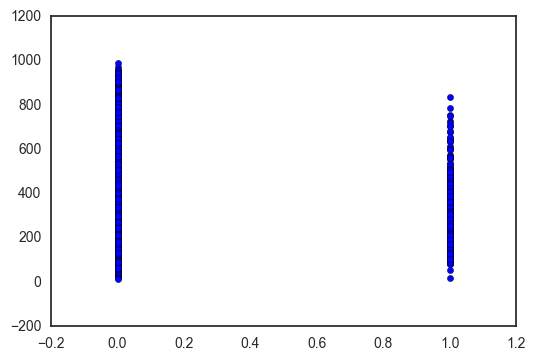

In [29]:
plt.scatter([0 if i == 'N' else 1 for i in likely_sales['SplitZone']], likely_sales['MarketValueSqFt'])

In [30]:
likely_sales.groupby('SplitZone')['MarketValueSqFt'].describe()

SplitZone       
N          count    18903.000000
           mean       347.780314
           std        148.545021
           min         15.277778
           25%        240.000000
           50%        323.604061
           75%        434.624599
           max        990.099010
Y          count      360.000000
           mean       324.602861
           std        145.407206
           min         18.733203
           25%        215.570282
           50%        302.287238
           75%        410.220233
           max        833.333333
Name: MarketValueSqFt, dtype: float64

It's not statistically meaningful, so we can drop it.

In [31]:
likely_sales = likely_sales.drop('SplitZone', axis='columns')

More possibly useful categorical variables...

In [32]:
likely_sales['BldgClass'].head()

Index
2     B2
5     A5
9     B9
11    C0
12    M1
Name: BldgClass, dtype: object

In [33]:
likely_sales['LandUse'].head()

Index
2     1.0
5     1.0
9     1.0
11    2.0
12    8.0
Name: LandUse, dtype: float64

Easements may prove useful...but it looks doubtful.

In [34]:
likely_sales['Easements'].value_counts()

0.0    19199
1.0       64
Name: Easements, dtype: int64

In [35]:
likely_sales.groupby('Easements')['MarketValueSqFt'].describe()

Easements       
0.0        count    19199.000000
           mean       347.551882
           std        148.572071
           min         15.277778
           25%        239.485981
           50%        323.401163
           75%        434.545855
           max        990.099010
1.0        count       64.000000
           mean       285.933144
           std        116.312066
           min         67.413710
           25%        205.675676
           50%        272.018750
           75%        338.457207
           max        687.636364
Name: MarketValueSqFt, dtype: float64

`OwnerType` is probably important. But `OwnerName` we drop.

In [36]:
likely_sales['OwnerType'].value_counts()

P    1098
O      29
X      25
C       1
Name: OwnerType, dtype: int64

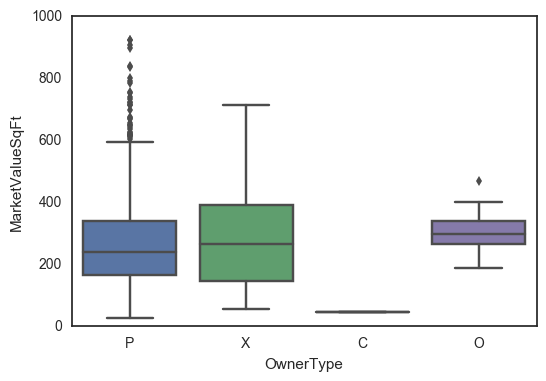

In [37]:
sns.boxplot(x="OwnerType", y="MarketValueSqFt", data=likely_sales)

In [38]:
likely_sales = likely_sales.drop('OwnerName', axis='columns')

Area columns might contain errors; we'll need to check them.

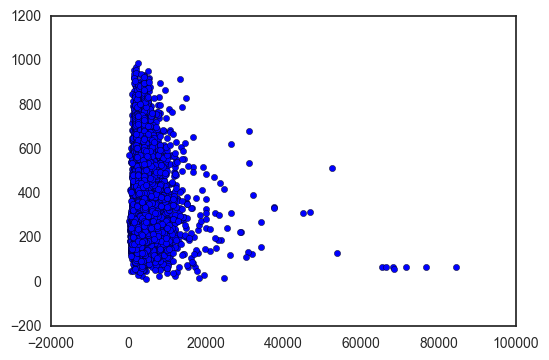

In [39]:
plt.scatter(likely_sales['LotArea'], likely_sales['MarketValueSqFt'])

In [40]:
likely_sales.sort_values(by='LotArea', ascending=False).head()[['Address', 'LotArea']]

,Address,LotArea
Index,,
18701,470 LENOX AVENUE,84425.0
18699,10 WEST 135 STREET,76650.0
18697,25 WEST 132 STREET,71575.0
29640,102-02 185 STREET,68600.0
18696,45 WEST 132 STREET,68200.0


Google Maps check: this is good.

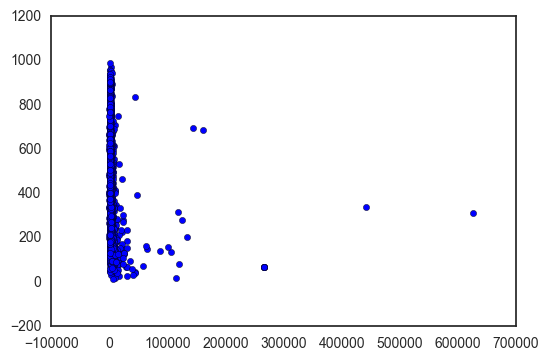

In [41]:
plt.scatter(likely_sales['BldgArea'], likely_sales['MarketValueSqFt'])

In [42]:
likely_sales.sort_values(by='BldgArea', ascending=False).head()[['Address', 'BldgArea']]

,Address,BldgArea
Index,,
18172,153 WEST 54 STREET,625844.0
18225,440 WEST 57 STREET,441347.0
18697,25 WEST 132 STREET,267008.0
18701,470 LENOX AVENUE,267008.0
18700,40 WEST 135 STREET,267008.0


Also correct.

We'll omit checking the remainder, these look good.

In [43]:
# 'LotArea', 'BldgArea',
#        'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
#        'StrgeArea', 'FactryArea', 'OtherArea'

In [44]:
likely_sales = likely_sales.drop('AreaSource', axis='columns')

The next set of variables have to do with the lot configuration. `LotType` should be important, while `Ext` and `IrrLotCode` can be dropped.

In [45]:
likely_sales[['BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType']]

,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType
Index,,,,,,
2,20.00,38.00,NaN,3.0,N,5.0
5,18.00,36.00,NaN,2.0,N,5.0
9,18.75,47.00,NaN,2.0,N,5.0
11,20.00,52.00,NaN,2.0,N,5.0
12,39.00,50.00,NaN,0.0,Y,5.0
13,16.67,50.00,NaN,3.0,N,5.0
16,17.75,50.00,NaN,3.0,N,5.0
27,22.00,30.00,NaN,2.0,N,5.0
29,20.00,38.00,NaN,2.0,N,5.0


In [46]:
likely_sales = likely_sales.drop(['Ext', 'IrrLotCode'], axis='columns')

The next set of variables...

* `BsmtCode` is going to be very interesting.
* Assess and Exempt vars are tax benefits, which are *quite* likely to factor into the price, given that the city's primary stimulus mechanism for construction is tax breaks. I will need to return to this variable, however, to decide how to featurize it.
* Year altered and built code can be dropped.
* Historical district might be useful.

In [47]:
likely_sales[[
'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'BuiltCode', 'YearAlter1', 'YearAlter2', 'HistDist'        
    ]]

,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist
Index,,,,,,,,,,
2,0.0,11100.0,21120.0,1550.0,1550.0,1993.0,NaN,0.0,0.0,NaN
5,1.0,2650.0,8150.0,0.0,0.0,1901.0,E,0.0,0.0,Bertine Block Historic District
9,2.0,3130.0,9313.0,3130.0,3380.0,1899.0,E,0.0,0.0,Bertine Block Historic District
11,2.0,6034.0,25503.0,4682.0,24151.0,2006.0,NaN,0.0,0.0,NaN
12,5.0,17100.0,60300.0,0.0,0.0,1931.0,E,0.0,0.0,NaN
13,1.0,5419.0,23277.0,0.0,0.0,1910.0,E,2000.0,0.0,Mott Haven East Historic District
16,1.0,2396.0,10335.0,0.0,0.0,1901.0,E,0.0,0.0,Mott Haven East Historic District
27,1.0,3451.0,8150.0,1550.0,1550.0,1899.0,E,0.0,0.0,NaN
29,2.0,7680.0,21900.0,1550.0,1550.0,1990.0,NaN,0.0,0.0,NaN


In [48]:
likely_sales = likely_sales.drop(['BuiltCode', 'YearAlter1', 'YearAlter2', 'HistDist'], axis='columns')

Next set of variables...

* FAR are important zoning variables for real estate development purposes.
* BBL is an identifier, we already have Borough, Block, Lot though so we'll drop this one.
* BoroCode is nicely featured for a classifier, but we'll use some smaller area for geography instead.
* The rest we can drop.

In [49]:
likely_sales[[
               'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2010', 'XCoord', 'YCoord', 'ZoneMap', 'ZMCode'
    ]]

,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode
Index,,,,,,,,,,,,,
2,NaN,0.76,2.43,0.0,4.8,2.0,2.022740e+09,0.0,43.0,1007891.0,235660.0,6a,NaN
5,NaN,1.37,2.43,0.0,4.8,2.0,2.022800e+09,0.0,25.0,1005433.0,233458.0,6a,NaN
9,NaN,1.44,2.43,0.0,4.8,2.0,2.022800e+09,0.0,25.0,1005659.0,233321.0,6a,NaN
11,NaN,1.56,2.43,0.0,4.8,2.0,2.022830e+09,0.0,39.0,1005986.0,234078.0,6a,NaN
12,NaN,1.00,2.43,0.0,4.8,2.0,2.022840e+09,0.0,39.0,1005932.0,234440.0,6a,NaN
13,NaN,2.00,2.43,0.0,4.8,2.0,2.022840e+09,0.0,39.0,1006128.0,234181.0,6a,NaN
16,NaN,1.80,2.43,0.0,4.8,2.0,2.022850e+09,0.0,39.0,1006100.0,234493.0,6a,NaN
27,NaN,0.94,2.43,0.0,4.8,2.0,2.022870e+09,0.0,41.0,1006558.0,234950.0,6a,NaN
29,NaN,1.14,2.43,0.0,4.8,2.0,2.022890e+09,0.0,43.0,1006793.0,235415.0,6a,NaN


In [50]:
likely_sales = likely_sales.drop(['BoroCode', 'BBL', 'CondoNo', 'Tract2010', 'XCoord', 'YCoord', 'ZoneMap', 
                                  'ZMCode'], axis='columns')

Next set...

* Most of these are IDs that can be dropped.
* Financial variables have been encoded into standardized value per square foot previously, and can be dropped.


In [51]:
likely_sales[[
       'Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID',
       'Version', 'CurFvT', 'NewFvT', 'CuravtA', 'AssessmentValueSqFt',
       'EstPriorMarketValueSqFt', 'EstCurentMarketValueSqFt'
]]

,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,
2,200 000,20901.0,NaN,2.022740e+09,7/20/1994,1.0,16v1,367000.0,352000.0,22020.0,9.657895,160.964912,154.385965
5,209S014,20901.0,NaN,0.000000e+00,NaN,1.0,16v1,311000.0,369000.0,8133.0,4.183642,159.979424,189.814815
9,209S014,20901.0,NaN,0.000000e+00,NaN,1.0,16v1,452000.0,479000.0,9304.0,3.472938,168.719672,178.798059
11,209S027,20901.0,NaN,2.022830e+09,1/25/2007,1.0,16v1,401000.0,541000.0,24060.0,7.711538,128.525641,173.397436
12,209S027,20901.0,NaN,0.000000e+00,NaN,1.0,16v1,127000.0,134000.0,57150.0,37.973422,84.385382,89.036545
13,209S027,20901.0,NaN,0.000000e+00,NaN,1.0,16v1,366000.0,494000.0,21960.0,6.586683,109.778044,148.170366
16,209S027,20901.0,NaN,0.000000e+00,NaN,1.0,16v1,404000.0,483000.0,9751.0,3.047188,126.250000,150.937500
27,209S028,20901.0,NaN,0.000000e+00,NaN,1.0,16v1,330000.0,366000.0,8126.0,3.472650,141.025641,156.410256
29,209N081,20901.0,NaN,2.022890e+09,10/21/1992,1.0,16v1,346000.0,365000.0,20760.0,9.105263,151.754386,160.087719


In [52]:
likely_sales = likely_sales.drop(['Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL',
                                 'APPDate', 'PLUTOMapID', 'Version', 'CurFvT', 'NewFvT', 'CuravtA'], axis='columns')

Alright, that was the initial pass. Now let's do through again and make final decisions and featurize.

In [53]:
i = -1

(0, 1000000.0)

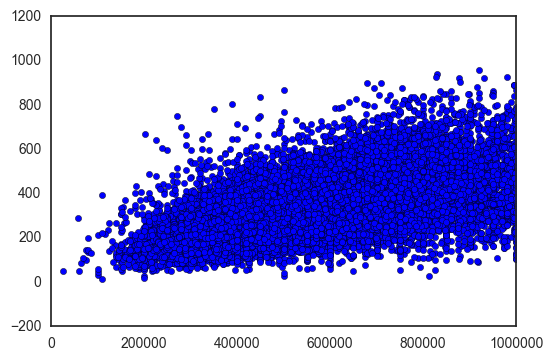

In [54]:
plt.scatter(likely_sales['SalePrice'], likely_sales['MarketValueSqFt'])
ax = plt.gca()
ax.set_xlim([0, 1e6])

* {Borough, Block, Lot} - Keep as ID.
* SalePrice - Encoded as market value per square foot. We'll keep it, however, as a variable of interest for looking at later.
* [a-z]\*SquareFeet - This is how we got `MarketValueSqFt` in the first place! By dividing `SalePrice` by this, specifically. We can drop this variable because it's half of the equation.

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


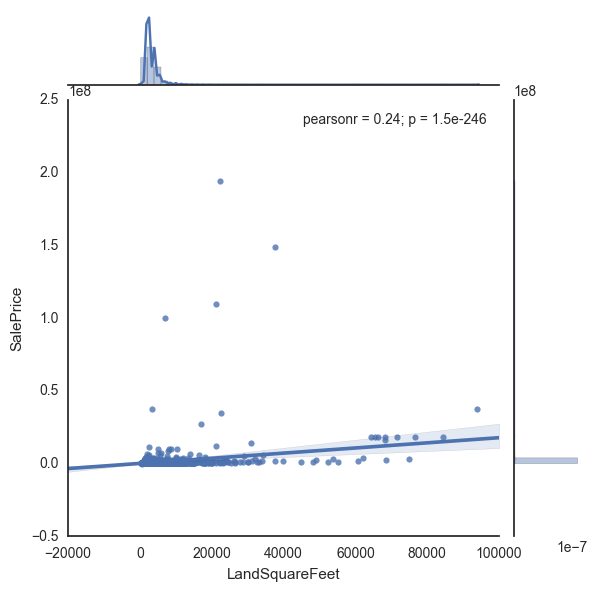

In [55]:
sns.jointplot(x="LandSquareFeet", y="SalePrice", data=likely_sales, kind="reg")

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


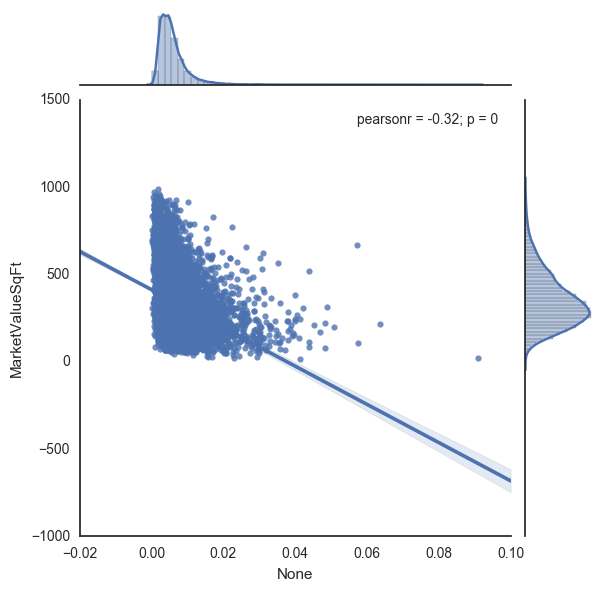

In [56]:
sns.jointplot(x=likely_sales["LandSquareFeet"] / likely_sales["SalePrice"], y=likely_sales["MarketValueSqFt"], kind="reg")

In [57]:
likely_sales = likely_sales.drop("LandSquareFeet", axis='columns')

* CD - We'll use a different geographical categorical variable.

In [58]:
len(likely_sales['ZipCode'].value_counts())

162

In [59]:
len(np.unique(likely_sales['CD']))

60

In [60]:
likely_sales = likely_sales.drop('CD', axis='columns')

* other categorical variables - Of these, the only one worth keeping is the most detailed one possible. FireComp fits that bill.

In [61]:
for var in ['FireComp', 'PolicePrct', 'HealthArea', 'SanitBoro',
       'SanitDistrict', 'SanitSub']:
    print(var, len(likely_sales[var].value_counts()))

FireComp 308
PolicePrct 73
HealthArea 198
SanitBoro 5
SanitDistrict 18
SanitSub 37


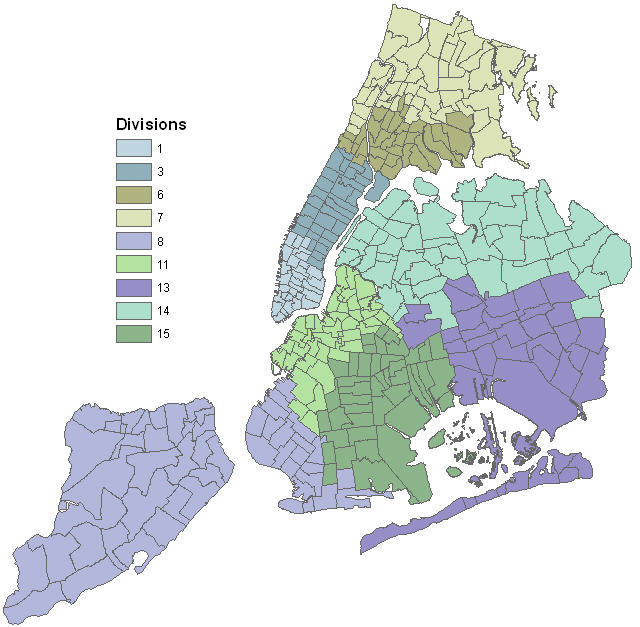

In [62]:
from IPython.display import Image
Image('https://gis.ny.gov/outreach/gist/images09/division.jpg')

In [63]:
likely_sales = likely_sales.drop(['PolicePrct', 'HealthArea', 'SanitBoro', 'SanitDistrict',
                                  'SanitSub'], axis='columns')

* Address - Obvious ID keep.

We need to do a dummy encode.

In [64]:
likely_sales['FireComp'].value_counts().head()

E167    296
E323    279
L126    246
E309    238
L170    237
Name: FireComp, dtype: int64

In [65]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['FireComp']).add_prefix('FireComp'))

In [66]:
likely_sales = likely_sales.drop('FireComp', axis='columns')

* CT2010 - Census tracts are *too* granular, we don't have enough data to fill them.
* CB2010 - Same.

In [67]:
i = -1

In [68]:
likely_sales= likely_sales.drop('CT2010', axis='columns')

In [69]:
likely_sales= likely_sales.drop('CB2010', axis='columns')

In [70]:
likely_sales = likely_sales.drop('SchoolDist', axis='columns')

In [71]:
likely_sales = likely_sales.drop('Council', axis='columns') 

* Zoning districts - These are going to be very interesting. Creating dummy variables for these is a little more involved, since they're split across multiple variables.

In [72]:
zoning_kinds = likely_sales[['ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4']].values.flatten()
zoning_kinds = np.unique(zoning_kinds[~pd.isnull(zoning_kinds)])

In [73]:
zoning_df = pd.DataFrame()
for zoning_kind in zoning_kinds:
    is_zoned = (likely_sales['ZoneDist1'] == zoning_kind).astype(int) +\
        (likely_sales['ZoneDist2'] == zoning_kind).astype(int) > 0
    zoning_df['Zoning_' + zoning_kind] = is_zoned
        # 3 and 4 are always nan in our dataset!

In [74]:
likely_sales = likely_sales.join(zoning_df)

In [75]:
likely_sales = likely_sales.drop(['ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4'], axis='columns') 

In [76]:
likely_sales = likely_sales.drop(['AllZoning1', 'AllZoning2'], axis='columns')

In [77]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['BldgClass']).add_prefix('BldgClass_'))

In [78]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['LandUse']).add_prefix('LandUse_'))

In [79]:
likely_sales = likely_sales.drop(['BldgClass', 'LandUse'], axis='columns')

Ha! Whatever.

In [80]:
likely_sales['Overlay2'].value_counts()

C2-3    1
Name: Overlay2, dtype: int64

In [81]:
likely_sales = likely_sales.drop(['Overlay2'], axis='columns')

In [82]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['Overlay1']).add_prefix('Overlay_'))

In [83]:
likely_sales = likely_sales.drop(['Overlay1'], axis='columns')

Special purpose districts...

In [84]:
likely_sales['SPDist1'].value_counts()

SRD      1343
OP        220
BR        193
HS        188
NA-1       55
CD         34
DJ         18
NA-2       13
PC          7
CO          5
LIC         4
MX-14       4
EC-1        3
MX-7        3
SB          3
C           3
LM          3
HP          2
HY          2
MID         2
HSQ         1
SG          1
TMU         1
MX-8        1
CL          1
MX-15       1
MX-1        1
Name: SPDist1, dtype: int64

In [85]:
likely_sales['SPDist2'].value_counts()

Series([], Name: SPDist2, dtype: int64)

In [86]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['SPDist1']).add_prefix('SPDist_'))

In [87]:
likely_sales = likely_sales.drop(['SPDist1', 'SPDist2'], axis='columns')

In [88]:
likely_sales = likely_sales.drop(['LtdHeight'], axis='columns')

`OwnerType` time.

In [89]:
likely_sales['OwnerType'] = likely_sales['OwnerType'].fillna('U')

In [90]:
owner_type_map = {
    'P': 'Private',
    'M': 'Mixed',
    'O': 'Public',
    'C': 'Public',
    'U': 'Unknown'  # probably private.
}
likely_sales['OwnerType'] = likely_sales['OwnerType'].map(owner_type_map)

In [91]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['OwnerType']).add_prefix('OwnerType_'))

In [92]:
likely_sales = likely_sales.drop(['OwnerType'], axis='columns')

The following two variables are not reliable due to the way they are computed within PLUTO.

In [93]:
likely_sales = likely_sales.drop(['NumBldgs'], axis='columns')

In [94]:
likely_sales = likely_sales.drop(['NumFloors'], axis='columns')

In [95]:
likely_sales['ProxCode'].value_counts()

1.0    8844
2.0    5340
3.0    4341
0.0     738
Name: ProxCode, dtype: int64

In [96]:
prox_map = {
    0: 'Not Available',
    1: 'Detached',
    2: 'Semi-Attached',
    3: 'Attached'
}

likely_sales['ProxCode'] = likely_sales['ProxCode'].map(prox_map)

In [97]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['ProxCode']).add_prefix('ProxCode_'))

In [98]:
likely_sales = likely_sales.drop(['ProxCode'], axis='columns')

In [99]:
lot_type_map = {
    0: 'Mixed or Unknown',
    1: 'Entire Block',
    2: 'Watefront',
    3: 'Blockface Corner',
    4: 'Inside Blockface',
    5: 'No Street Frontage',
    6: 'Island',
    7: 'Alley'
}

likely_sales['LotType'] = likely_sales['LotType'].map(lot_type_map)

In [100]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['LotType']).add_prefix('LotType_'))

In [101]:
likely_sales = likely_sales.drop(['LotType'], axis='columns')

In [102]:
bsmnt_map = {
    0: 'No Basement',
    1: 'Full Basement Above Grade',
    2: 'Full Basement Below Grade',
    3: 'Partial Basement Above Grade',
    4: 'Partial Basement Below Grade',    
}
likely_sales['BsmtCode'] = likely_sales['BsmtCode'].map(bsmnt_map)

In [103]:
likely_sales = likely_sales.join(pd.get_dummies(likely_sales['BsmtCode']).add_prefix('BsmtCode_'))

In [108]:
likely_sales = likely_sales.drop(['BsmtCode'], axis='columns')

In [107]:
likely_sales['Landmark'] = likely_sales['Landmark'].map(lambda v: pd.notnull(v))

One correction...

In [104]:
likely_sales.columns = [col.replace("FireComp", "FireComp_") for col in likely_sales.columns]

Our variables:

In [109]:
list(likely_sales.columns)

['Borough',
 'Block',
 'Lot',
 'SalePrice',
 'MarketValueSqFt',
 'ZipCode',
 'Address',
 'Easements',
 'LotArea',
 'BldgArea',
 'ComArea',
 'ResArea',
 'OfficeArea',
 'RetailArea',
 'GarageArea',
 'StrgeArea',
 'FactryArea',
 'OtherArea',
 'UnitsRes',
 'UnitsTotal',
 'LotFront',
 'LotDepth',
 'BldgFront',
 'BldgDepth',
 'AssessLand',
 'AssessTot',
 'ExemptLand',
 'ExemptTot',
 'YearBuilt',
 'Landmark',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR',
 'AssessmentValueSqFt',
 'EstPriorMarketValueSqFt',
 'EstCurentMarketValueSqFt',
 'FireComp_E001',
 'FireComp_E003',
 'FireComp_E007',
 'FireComp_E008',
 'FireComp_E010',
 'FireComp_E014',
 'FireComp_E016',
 'FireComp_E021',
 'FireComp_E023',
 'FireComp_E028',
 'FireComp_E033',
 'FireComp_E035',
 'FireComp_E037',
 'FireComp_E038',
 'FireComp_E040',
 'FireComp_E042',
 'FireComp_E043',
 'FireComp_E044',
 'FireComp_E045',
 'FireComp_E046',
 'FireComp_E048',
 'FireComp_E050',
 'FireComp_E052',
 'FireComp_E058',
 'FireComp_E059',
 'FireComp_E

Finally save. Whoo.

In [110]:
likely_sales.to_csv("../data/processed/likely_sales_featurized.csv")